# Text Visualization Lab
In this lab, you are going to analyse a twitter dataset containing users' new year resolutions for 2015. After your analysis, you should be able to answer:
#### - What are the topics of new year's resolutions?
#### - How do these topics distribute in text?

### To answer the questions above, please follow the steps listed below, and demonstrate your results for each of them.
1. Explore your data: What do you learn from the data sense-making process? 
2. Pre-process your data: What pre-processing methods are you using?
3. Analyse your data.<br/>
If you use any Machine Learning Models in your analysis, please answer:
   - how do you choose your machine learning models used for this task?<br/>
   - how do you select parameters?<br/><br/>
4. Display your answers for  `What are the topics of new year's resolutions?`, `How does those topics distribute in text?` with <strong>static</strong> visualizations.

### The data loading part is provided below. Please add your code and explanations after the data loading part.
If you are new to Jupyter Notebook, you may need to know the following things:
1. You can click `Cell`->`Cell Type`->`Markdown` to change the cell into text in Markdown format. Google `Markdown` to learn the grammar.

In [2]:
import numpy as np, pandas as pd
import gensim, spacy
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import nltk

## Load Data

In [4]:
df = pd.read_csv(filepath_or_buffer='New-Year-Resolution.csv', sep=',',
                         header=0, index_col=None, lineterminator='\n')

## Data Sense-making

In [5]:
df.head(10)

,name,text,tweet_date,tweet_location,tweet_state,user_timezone
0,Dena_Marina,"#NewYearsResolution :: Read more books, No scr...",12/31/14,Southern California,CA,Pacific Time (US & Canada)
1,ninjagirl325,#NewYearsResolution Finally master @ZJ10 's pa...,12/31/14,New Jersey,NJ,Central Time (US & Canada)
2,RickyDelReyy,#NewYearsResolution to stop being so damn perf...,12/31/14,Hollywood,CA,Eastern Time (US & Canada)
3,CalmareNJ,My #NewYearsResolution is to help my disabled ...,12/31/14,Metro NYC,NY,NaN
4,welovatoyoudemi,#NewYearsResolution #2015Goals #2015bucketlist...,12/31/14,"Pittsburgh, Pennsylvania",PA,Eastern Time (US & Canada)
5,EthanJMoroles,#NewYearsResolution 1. Eat less.\r2.quit lying.,12/31/14,Odessa Texas.,TX,NaN
6,jon__bay,My #NewYearsResolution \r\r-Learn how to drive...,12/31/14,"Santa Cruz, CA",CA,Tijuana
7,freckleface_kev,_êØ@Becca3129 #NewYearsResolution #ForReal #Th...,12/31/14,North Carolina,NC,Eastern Time (US & Canada)
8,yourethe1zforme,Save a pit bulls life #NewYearsResolution,12/31/14,North Carolina,NC,Eastern Time (US & Canada)
9,Dandridge9,RT @_Dear_Leader_: #NewYearsResolution - I wil...,12/31/14,"Portland, Oregon USA",OR,Arizona


In [7]:
print(df.shape)

(5011, 6)


## Data Preprocessing

In [8]:
data = df['text'].values

In [19]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

stop_words = stopwords.words('english')
stop_words.extend(['new', 'year', 'resolution', 'newyearresolution', 'from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 
                   'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 
                   'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 
                   'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

data_words = list(map(gensim.utils.simple_preprocess, data))

In [40]:
data_words = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_words]

data_ready = []
# Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB',]
for sent in data_words:
    # Parse the sentence using the loaded 'en' model object `nlp`. Extract the lemma for each token and join
    doc = nlp(" ".join(sent)) 
    data_ready.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
# remove stopwords once more after lemmatization
data_ready = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_ready]

In [42]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [43]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.041*"way" + 0.041*"time" + 0.033*"start" + 0.028*"body" + 0.022*"thing" + '
  '0.022*"people" + 0.022*"newyearseve" + 0.022*"day" + 0.018*"money" + '
  '0.015*"lose"'),
 (1,
  '0.125*"co" + 0.118*"http" + 0.038*"learn" + 0.030*"shape" + 0.027*"goal" + '
  '0.011*"live" + 0.008*"health" + 0.008*"travel" + 0.007*"https" + '
  '0.007*"tapp"'),
 (2,
  '0.055*"love" + 0.038*"stop" + 0.030*"friend" + 0.020*"find" + 0.015*"read" '
  '+ 0.013*"tweet" + 0.012*"girl" + 0.010*"yoga" + 0.010*"quit" + '
  '0.009*"drink"'),
 (3,
  '0.064*"jan" + 0.054*"amp" + 0.023*"healthy" + 0.021*"happy" + '
  '0.019*"newyear" + 0.018*"work" + 0.018*"keep" + 0.013*"weight" + '
  '0.012*"cariloha" + 0.012*"change"'),
 (4,
  '0.033*"eat" + 0.029*"life" + 0.021*"become" + 0.021*"less" + 0.014*"follow" '
  '+ 0.011*"grow" + 0.010*"resolve" + 0.010*"fit" + 0.010*"selfie" + '
  '0.010*"tell"')]


In [44]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.4666,"love, stop, friend, find, read, tweet, girl, y...","[read, book, scroll, check, email, breakfast, ..."
1,1,0.0,0.8137,"way, time, start, body, thing, people, newyear...","[master, part, kitchen, sink]"
2,2,2.0,0.7899,"love, stop, friend, find, read, tweet, girl, y...","[stop, damn, perf]"
3,3,2.0,0.4199,"love, stop, friend, find, read, tweet, girl, y...","[help, disabled, patient, discover, emotional,..."
4,4,1.0,0.7090,"co, http, learn, shape, goal, live, health, tr...","[goal, bucketlist, continue, http, co, twjg]"
5,5,4.0,0.5795,"eat, life, become, less, follow, grow, resolve...","[eat, less, quit, lying]"
6,6,1.0,0.6150,"co, http, learn, shape, goal, live, health, tr...","[learn, drive, apologize, read, write, upcomin..."
7,7,1.0,0.5344,"co, http, learn, shape, goal, live, health, tr...","[becca, forreal, thestruggle, http, co, kabowm..."
8,8,4.0,0.8286,"eat, life, become, less, follow, grow, resolve...","[save, pit, bull, life]"
9,9,3.0,0.7261,"jan, amp, healthy, happy, newyear, work, keep,...","[decent, haircut]"


## How documents distribute in differnt topics

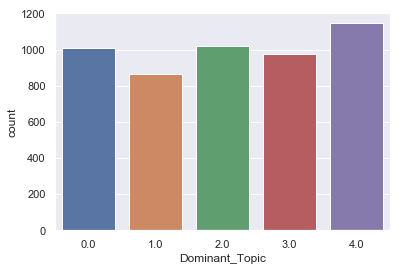

In [45]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Dominant_Topic", data=df_dominant_topic)

## How terms contribute to each topic

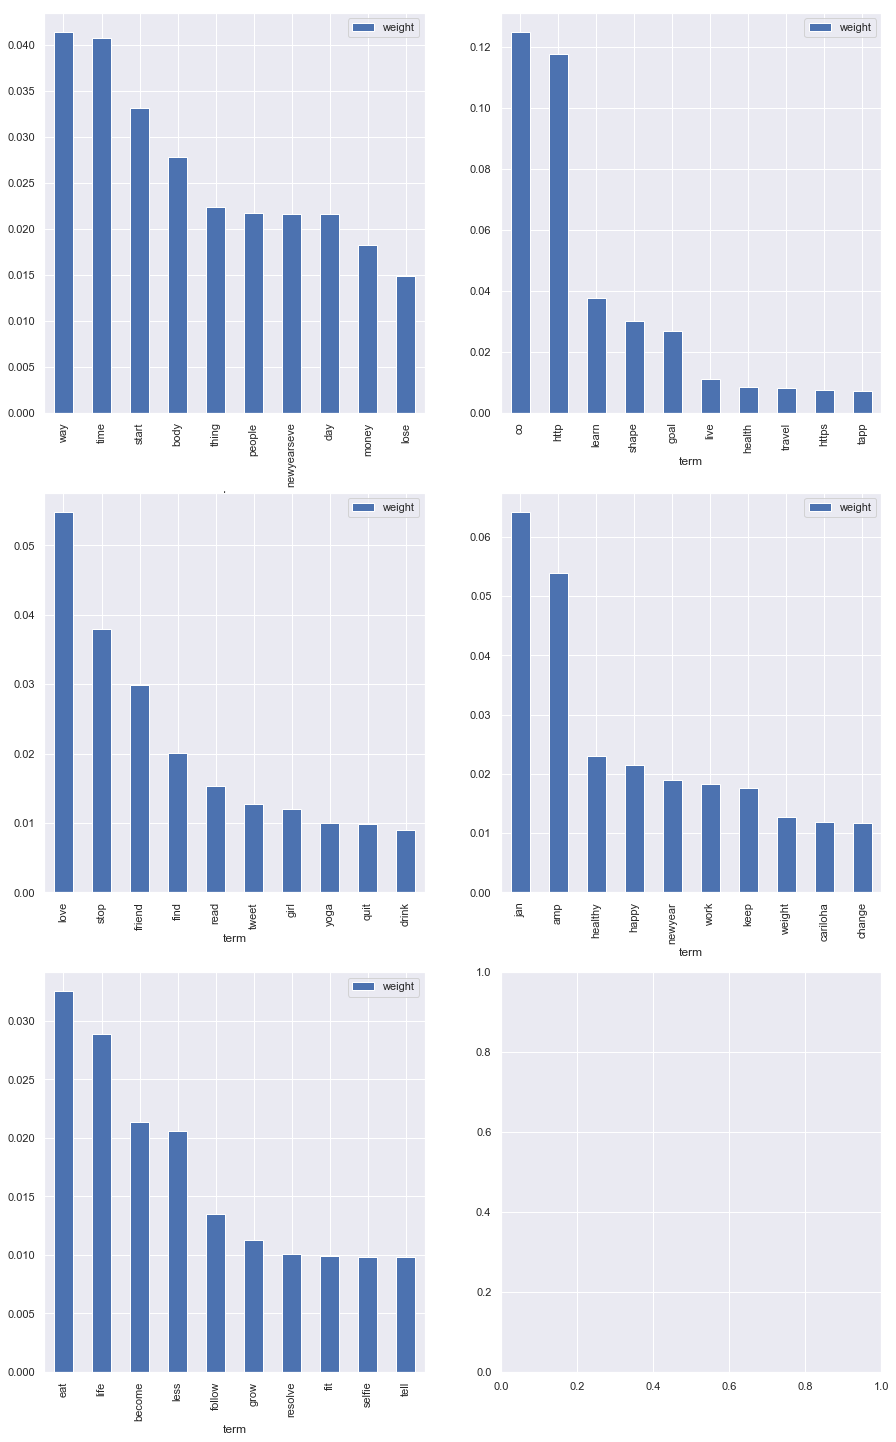

In [62]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,25))

for i in range(5):
    terms = [id2word[term[0]] for term in lda_model.get_topic_terms(i, topn=10)]
    weights = [term[1] for term in lda_model.get_topic_terms(i, topn=10)]
    topic = pd.DataFrame()
    topic["term"] = terms
    topic["weight"] = weights
    topic.set_index('term').plot(kind="bar", ax=axes[int(i/2), i%2])
    
plt.show()